In [ ]:
#Google Colab Notebook

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data=pd.read_csv('/content/Musical_instruments_reviews.csv',error_bad_lines=False)
data.head()

<ipython-input-18-1ebc723f147a>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data=pd.read_csv('/content/Musical_instruments_reviews.csv',error_bad_lines=False)


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [ ]:
data.shape

(10261, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


In [ ]:
data.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [ ]:
data.dropna(subset=['reviewText'],inplace=True)
data.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data['overall'].value_counts()

5.0    6932
4.0    2083
3.0     772
2.0     250
1.0     217
Name: overall, dtype: int64

In [ ]:
# 0->negative, 1->postive, 2->neutral
overall=[]

for i in data['overall']:
    if i==5.0 or i==4.0:
        overall.append(1) #postive
    elif i==3.0:
        overall.append(2) #neutral
    else :
        overall.append(0) #negative
data['label']=overall
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,label
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014",1
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",1
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",1
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",1
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",1


In [ ]:
label1=data[data['label']==1]['label'].value_counts()/data.shape[0]*100
label0=data[data['label']==0]['label'].value_counts()/data.shape[0]*100
label2=data[data['label']==2]['label'].value_counts()/data.shape[0]*100
label0,label1,label2

(0    4.55432
 Name: label, dtype: float64,
 1    87.91691
 Name: label, dtype: float64,
 2    7.528769
 Name: label, dtype: float64)

Almost 88% of amazon reviews are positive

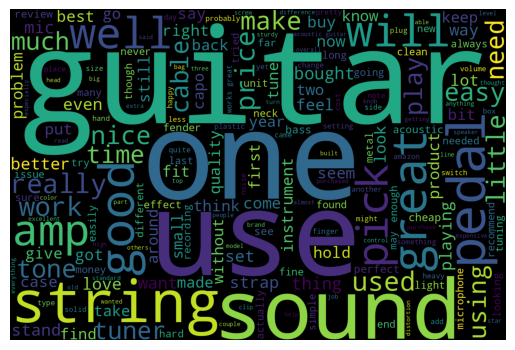

In [70]:
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)
text=data[data['label']==1]['reviewText']
text=' '.join(text)
text=text.lower()
# print(text)
wordcloud=WordCloud(width=1500,height=1000,stopwords=stopwords).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

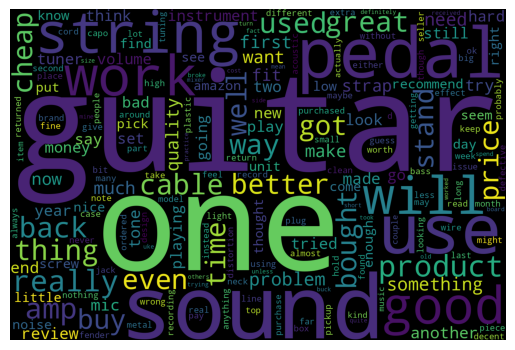

In [75]:
text=data[data['label']==0]['reviewText']
text=' '.join(text)
text=text.lower()
wordcloud=WordCloud(stopwords=stopwords,width=1500,height=1000).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

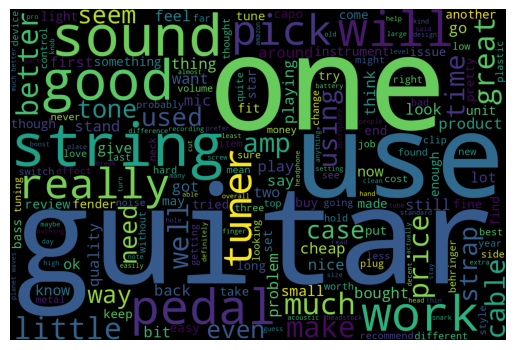

In [77]:
text=data[data['label']==2]['reviewText']
text=' '.join(text)
text=text.lower()
wordcloud=WordCloud(stopwords=stopwords,width=1500,height=1000).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Most of the reviews are about guitar

In [ ]:
data['review']=data['reviewText']+' '+data['summary']
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,label,review
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014",1,"Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013",1,The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013",1,The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014",1,Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014",1,This pop filter is great. It looks and perform...


In [ ]:
import re
import nltk
# nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps=PorterStemmer()

corpus=[]

for sen in data['review']:
  sen=re.sub('[^a-zA-Z]',' ',sen)
  sen=sen.lower()
  sen=sen.split()
  doc=[ps.stem(word) for word in sen if word not in stopwords.words('english')]
  doc=' '.join(doc)
  corpus.append(doc)

corpus

['much write exactli suppos filter pop sound record much crisp one lowest price pop filter amazon might well buy honestli work despit price good',
 'product exactli quit afford realiz doubl screen arriv even better expect ad bonu one screen carri small hint smell old grape candi use buy reminisc sake cannot stop put pop filter next nose smell record dif need pop filter work well expens one may even come pleas aroma like mine buy product jake',
 'primari job devic block breath would otherwis produc pop sound allow voic pass notic reduct volum high frequenc doubl cloth filter block pop let voic color metal clamp mount attach mike stand secur enough keep attach goos neck need littl coax stay put job well',
 'nice windscreen protect mxl mic prevent pop thing gooseneck margin abl hold screen posit requir care posit clamp avoid sag good windscreen money',
 'pop filter great look perform like studio filter record vocal elimin pop get record sing pop record vocal',
 'good bought anoth one love

In [41]:
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer
vocab_size=5000
tfidf=TfidfVectorizer(max_features=5000,ngram_range=(2,3))
tfidf_corpus=tfidf.fit_transform(corpus)
tfidf.vocabulary_

{'exactli suppos': 988,
 'sound record': 3784,
 'pop filter': 3100,
 'well buy': 4748,
 'price good': 3166,
 'even better': 945,
 'better expect': 321,
 'use buy': 4493,
 'work well': 4888,
 'well expens': 4758,
 'expens one': 1012,
 'may even': 2335,
 'even come': 947,
 'buy product': 466,
 'high frequenc': 1731,
 'enough keep': 922,
 'goos neck': 1405,
 'need littl': 2524,
 'stay put': 3877,
 'job well': 1840,
 'great look': 1469,
 'record vocal': 3446,
 'bought anoth': 387,
 'anoth one': 174,
 'one love': 2713,
 'bass sound': 260,
 'sound great': 3747,
 'last night': 1901,
 'still work': 3903,
 'work great': 4854,
 'best cabl': 293,
 'bought anoth one': 388,
 'still work great': 3904,
 'monster cabl': 2428,
 'year good': 4979,
 'good reason': 1376,
 'lifetim warranti': 1951,
 'worth price': 4908,
 'get replac': 1249,
 'instrument cabl': 1813,
 'use cabl': 4494,
 'cabl run': 506,
 'pedal chain': 2837,
 'fender amp': 1077,
 'pedal board': 2832,
 'thought would': 4214,
 'would tri': 49

In [42]:
from sklearn.model_selection import train_test_split

X=tfidf_corpus
y=data['label']


from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=3)
X,y=smote.fit_resample(X,y)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=40,test_size=0.2)

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((21636, 5000), (21636,), (5409, 5000), (5409,))

Implementing different models on our training dataset for accuracy <br>


1.   Logistic Regression
2.   Random Forest
3.   SVM
4.   Naive Bayes



In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [59]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model_lr=lr.fit(X_train,y_train)
y_lr=model_lr.predict(X_test)
accuracy_score(y_test,y_lr)*100

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


89.48049547051211

In [46]:
print(classification_report(y_test,y_lr))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1821
           1       0.96      0.77      0.86      1773
           2       0.84      0.96      0.90      1815

    accuracy                           0.89      5409
   macro avg       0.90      0.89      0.89      5409
weighted avg       0.90      0.89      0.89      5409



In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=25)

model_rfc=rfc.fit(X_train,y_train)
y_rfc=model_rfc.predict(X_test)
print(accuracy_score(y_rfc,y_test)*100)

91.97633573673507


In [54]:
print(classification_report(y_rfc,y_test))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92      2079
           1       0.80      0.99      0.89      1431
           2       0.97      0.92      0.94      1899

    accuracy                           0.92      5409
   macro avg       0.92      0.93      0.92      5409
weighted avg       0.93      0.92      0.92      5409



In [61]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')

model_svc=svc.fit(X_train,y_train)
y_svc=model_svc.predict(X_test)

print(accuracy_score(y_test,y_svc)*100)

98.4840081345905


In [56]:
print(classification_report(y_test,y_svc))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1821
           1       1.00      0.99      0.99      1773
           2       1.00      0.97      0.98      1815

    accuracy                           0.98      5409
   macro avg       0.99      0.98      0.98      5409
weighted avg       0.99      0.98      0.98      5409



In [62]:
from sklearn.naive_bayes import BernoulliNB

nb=BernoulliNB()
model_nb=nb.fit(X_train,y_train)
y_nb=model_nb.predict(X_test)

print(accuracy_score(y_nb,y_test)*100)

87.42836014050657


In [58]:
print(classification_report(y_nb,y_test))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90      2133
           1       0.80      0.92      0.86      1541
           2       0.84      0.88      0.86      1735

    accuracy                           0.87      5409
   macro avg       0.87      0.88      0.87      5409
weighted avg       0.88      0.87      0.88      5409



We can see that the highest accuracy is obtained from Support Vector Machine algorithmn <br>

Accuracy:<br>
1.   Logistic Regression - 89.5%
2.   Random Forest - 92%
3.   SVM - 98.5%
4.   Naive Bayes - 87.5%

